In [1]:
import pandas as pd
import numpy as np
import scipy.misc
import imutils
import math
from numpy import linalg as LA
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers.core import Dropout
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.utils import np_utils
from keras.models import model_from_json
from keras.optimizers import Adam
import time
from imutils.video import VideoStream
from imutils import face_utils
import face_recognition
import dlib
import cv2
from PIL import Image
import tensorflow as tf

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:

target = ['angry','disgust','fear','happy','sad','surprise','neutral']

def load_model(name):
    model = model_from_json(open(name+'_architecture.json').read())
    model.load_weights(name + '_weights.h5')
    return(model)

In [3]:

def total_landmark(img):
    landmarks_a_face = []
    face_landmarks = face_recognition.face_landmarks(img)
    if(len(face_landmarks) > 0):
        args = (face_landmarks[0]['chin'], face_landmarks[0]['left_eyebrow'], 
        face_landmarks[0]['right_eyebrow'],face_landmarks[0]['nose_bridge'], 
        face_landmarks[0]['right_eye'], face_landmarks[0]['top_lip'], face_landmarks[0]['left_eye'],
        face_landmarks[0]['bottom_lip'],face_landmarks[0]['nose_tip'])
        landmarks_a_face=np.concatenate(args)
    return landmarks_a_face
model = load_model('model2')

In [4]:

def process_data_landmarks(img):
    data_landmarks = []
    landmarks = total_landmark(img)
    x_cordinates = []
    y_cordinates = []
    for i in range(len(landmarks)):
        x_cordinates.append(landmarks[i][0])
        y_cordinates.append(landmarks[i][1])
    # determine the center point
    x_mean = np.mean(x_cordinates)
    y_mean = np.mean(y_cordinates)
    
    # distance
    x_dis = (x_cordinates - x_mean)
    y_dis = y_cordinates - y_mean
    
    for x_dis,y_dis,x,y in zip(x_dis, y_dis, x_cordinates, y_cordinates):
        data_landmarks.append(x)
        data_landmarks.append(y)
        meannp = np.asarray((x_mean, y_mean))
        coornp = np.asarray((x, y))
        dist = np.linalg.norm(coornp-meannp)
        data_landmarks.append(dist)
        #direction
        data_landmarks.append((math.atan2(y_dis, x_dis)*360)/(2*math.pi))
    
    return data_landmarks
    

In [ ]:
if len(face_locations) > 0:
    text = "{} face(s) found".format(len(face_locations))
    cv2.putText(img, text, (10, 20), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0, 0, 255), 2)

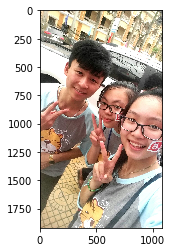

In [5]:
img = face_recognition.load_image_file('Cuong.jpg')
plt.imshow(img)

In [7]:
face_locations = face_recognition.face_locations(img)


In [8]:
if len(face_locations) > 0:
    text = "{} face(s) found".format(len(face_locations))
    cv2.putText(img, text, (10, 20), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0, 0, 255), 2)
    for face in face_locations:
        top, right, bottom, left = face
        
        face_crop = img[top:bottom, left:right]
        face_crop = cv2.resize(face_crop,(48,48))
        face_directs = []
        face_directs.append(process_data_landmarks(face_crop))
        face_directs = np.asarray(face_directs)
        if(face_directs.shape[1] > 0):
            prediction = model.predict_classes(face_directs, batch_size=64)
        
            result = target[prediction[0]]
            cv2.putText(img,result,(top,right), cv2.FONT_HERSHEY_SIMPLEX, 1, (200,0,0), 3, cv2.FONT_HERSHEY_SIMPLEX)
        else:
            cv2.putText(img,'No detection',(top,right), cv2.FONT_HERSHEY_SIMPLEX, 1, (200,0,0), 3, cv2.FONT_HERSHEY_SIMPLEX)

In [9]:
img1 = cv2.imwrite('cuong2.jpg', img)


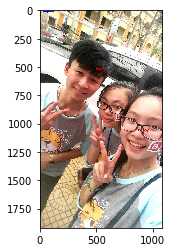

In [10]:
img1 = cv2.imread('cuong2.jpg')
plt.imshow(img1)